Base

In [3]:
BASE: int = 1
REFLEXO_BASE: int = 5
VELOCIDADE_BASE: int = 8
VITALIDADE_BASE: int = 44
ENERGIA_BASE: int = 45
DANO_BASE: int = 7

class Atributos:
    def __init__(self) -> None:
        """
        Base de atributibutos primarios da mecanica,
            Força,
            Agilidade,
            Inteligencia,
            Vitalidade,
            Magia
        """
        self.forca: dict = { "forca": 11}
        self.agilidade: dict = { "agilidade": 11}
        self.inteligencia: dict = { "inteligencia": 11}
        self.vitalidade: dict = { "vitalidade": 11}
        self.magia: dict = { "magia": 11}

class Atribuicao(Atributos):
    def __init__(self) -> None:
        """
        Base de atribuição ou atributos secundarios.
            Estamina,
            Dextreza,
            Intuição,
            Resistencia,
            Sabedoria
        """
        super().__init__()
        self.estamina: dict = { "estamina": self.calcular_valor_herdado(self.forca) }
        self.dextreza: dict = { "dextreza": self.calcular_valor_herdado(self.agilidade) }
        self.intuicao: dict = { "intuicao": self.calcular_valor_herdado(self.inteligencia) }
        self.resistencia: dict = { "resistencia": self.calcular_valor_herdado(self.vitalidade) }
        self.sabedoria: dict = { "sabedoria": self.calcular_valor_herdado(self.magia) }

    def calcular_valor_herdado(self, atributo_base):
        return round(atributo_base[next(iter(atributo_base))] * 0.4)

class AtributosStatus(Atribuicao):
    """
    Base para o cálculo do status dos atributos:
        Dano Fisico Base,
        Velocidade,
        Reflexo,
        Vitalidade Total,
        Energia Total
    """
    def __init__(self) -> None:
        super().__init__()

        # Dano Fisico Base
        self.dano_fisico_base = self.calcular_dano_fisico_base()

        # Velocidade
        self.velocidade = self.calcular_velocidade()

        # Reflexo
        self.reflexo = self.calcular_reflexo()

        # Vitalidade Total
        self.vitalidade_total = self.calcular_vitalidade_total()

        # Energia Total
        self.energia_total = self.calcular_energia_total()

    def calcular_dano_fisico_base(self):
        forca = self.forca[next(iter(self.forca))]
        estamina = self.estamina[next(iter(self.estamina))]
        return round(forca * 0.4 + estamina * 0.6) + DANO_BASE

    def calcular_velocidade(self):
        agilidade = self.agilidade[next(iter(self.agilidade))]
        dextreza = self.dextreza[next(iter(self.dextreza))]
        return round(agilidade * 0.6 + dextreza * 0.4) + VELOCIDADE_BASE

    def calcular_reflexo(self):
        intuicao = self.intuicao[next(iter(self.intuicao))]
        inteligencia = self.inteligencia[next(iter(self.inteligencia))]
        return round(intuicao * 0.85 + inteligencia * 0.15) + REFLEXO_BASE

    def calcular_vitalidade_total(self):
        vitalidade = self.vitalidade[next(iter(self.vitalidade))]
        resistencia = self.resistencia[next(iter(self.resistencia))]
        return ((vitalidade * resistencia) * BASE) + VITALIDADE_BASE

    def calcular_energia_total(self):
        magia = self.magia[next(iter(self.magia))]
        sabedoria = self.sabedoria[next(iter(self.sabedoria))]
        return ((magia * sabedoria) * BASE) + ENERGIA_BASE

if __name__ == '__main__':
    atribuicao = Atribuicao()
    print(f'Teste Primario: {__name__}')
    print(atribuicao.forca)        # Saída: {'forca': 11}
    print(atribuicao.agilidade)    # Saída: {'agilidade': 11}
    print(atribuicao.inteligencia) # Saída: {'inteligencia': 11}
    print(atribuicao.vitalidade)   # Saída: {'vitalidade': 11}
    print(atribuicao.magia)        # Saída: {'magia': 11}
    print(atribuicao.estamina)     # Saída: {'estamina': 4}
    print(atribuicao.dextreza)     # Saída: {'dextreza': 4}
    print(atribuicao.intuicao)     # Saída: {'intuicao': 4}
    print(atribuicao.resistencia)  # Saída: {'resistencia': 4}
    print(atribuicao.sabedoria)    # Saída: {'sabedoria': 4}

    atributos_status = AtributosStatus()
    print(f'Teste Secundario: {__name__}')
    print('dano fisico',atributos_status.dano_fisico_base)   # Saída: 7 (80% de força + 20% de estamina)
    print('Velocidade',atributos_status.velocidade)         # Saída: 8 (60% de agilidade + 40% de dextreza)
    print('Reflexo',atributos_status.reflexo)            # Saída: 10 (85% de intuição + 15% de inteligência)
    print('Vitalidade',atributos_status.vitalidade_total)   # Saída: 44 (vitalidade * resistência)
    print('Total Energia',atributos_status.energia_total)      # Saída: 484 (magia * sabedoria * 2)





Teste Primario: __main__
{'forca': 11}
{'agilidade': 11}
{'inteligencia': 11}
{'vitalidade': 11}
{'magia': 11}
{'estamina': 4}
{'dextreza': 4}
{'intuicao': 4}
{'resistencia': 4}
{'sabedoria': 4}
Teste Secundario: __main__
dano fisico 14
Velocidade 16
Reflexo 10
Vitalidade 88
Total Energia 89


In [4]:

class Guerreiro(AtributosStatus):
    def __init__(self) -> None:
        super().__init__()

        # Atributos base específicos do Guerreiro
        self.forca = {"forca": 15}
        self.agilidade = {"agilidade": 10}
        self.vitalidade = {"vitalidade": 14}

        # Ataque Especial do Guerreiro
        self.ataque_especial = "Corte Poderoso"
        self.habilidade_magica = "Bersek"

    # Método para imprimir informações sobre o Guerreiro
    def imprimir_informacoes(self):
        print("Classe: Guerreiro")
        print("Atributos Base:")
        print(f"Força: {self.forca[next(iter(self.forca))]}")
        print(f"Agilidade: {self.agilidade[next(iter(self.agilidade))]}")
        print(f"Vitalidade: {self.vitalidade[next(iter(self.vitalidade))]}")
        print("Atributos de Status:")
        print(f"Dano Físico Base: {self.dano_fisico_base}")
        print(f"Velocidade: {self.velocidade}")
        print(f"Reflexo: {self.reflexo}")
        print(f"Vitalidade Total: {self.vitalidade_total}")
        print(f"Energia Total: {self.energia_total}")
        print(f"Habilidade Mágica: {self.habilidade_magica}")
        print(f"Ataque Especial: {self.ataque_especial}")
        print("-" * 30)

class Mago(AtributosStatus):
    def __init__(self) -> None:
        super().__init__()

        # Atributos base específicos do Mago
        self.inteligencia = {"inteligencia": 18}
        self.magia = {"magia": 20}

        # Habilidade Mágica do Mago
        self.habilidade_magica = "Bola de Energia"
        self.poderOculto = "Despertar"
        
    # Método para imprimir informações sobre o Mago
    def imprimir_informacoes(self):
        print("Classe: Mago")
        print("Atributos Base:")
        print(f"Inteligência: {self.inteligencia[next(iter(self.inteligencia))]}")
        print(f"Magia: {self.magia[next(iter(self.magia))]}")
        print("Atributos de Status:")
        print(f"Dano Físico Base: {self.dano_fisico_base}")
        print(f"Velocidade: {self.velocidade}")
        print(f"Reflexo: {self.reflexo}")
        print(f"Vitalidade Total: {self.vitalidade_total}")
        print(f"Energia Total: {self.energia_total}")
        print(f"Habilidade Mágica: {self.habilidade_magica}")
        print("-" * 30)

class Arqueiro(AtributosStatus):
    def __init__(self) -> None:
        super().__init__()

        # Atributos base específicos do Arqueiro
        self.agilidade = {"agilidade": 17}
        self.dextreza = {"dextreza": 15}

        # Ataque à Distância do Arqueiro
        self.ataque_distancia = "Flecha Precisa"
        self.habilidade_magica = "Visão Melhorada"

    # Método para imprimir informações sobre o Arqueiro
    def imprimir_informacoes(self):
        print("Classe: Arqueiro")
        print("Atributos Base:")
        print(f"Agilidade: {self.agilidade[next(iter(self.agilidade))]}")
        print(f"Dextreza: {self.dextreza[next(iter(self.dextreza))]}")
        print("Atributos de Status:")
        print(f"Dano Físico Base: {self.dano_fisico_base}")
        print(f"Velocidade: {self.velocidade}")
        print(f"Reflexo: {self.reflexo}")
        print(f"Vitalidade Total: {self.vitalidade_total}")
        print(f"Energia Total: {self.energia_total}")
        print(f"Habilidade Mágica: {self.habilidade_magica}")
        print(f"Ataque à Distância: {self.ataque_distancia}")
        print("-" * 30)

# Exemplo de uso das classes
guerreiro = Guerreiro()
mago = Mago()
arqueiro = Arqueiro()

if __name__ == "__main__":
    guerreiro.imprimir_informacoes()
    mago.imprimir_informacoes()
    arqueiro.imprimir_informacoes()


Classe: Guerreiro
Atributos Base:
Força: 15
Agilidade: 10
Vitalidade: 14
Atributos de Status:
Dano Físico Base: 14
Velocidade: 16
Reflexo: 10
Vitalidade Total: 88
Energia Total: 89
Habilidade Mágica: Bersek
Ataque Especial: Corte Poderoso
------------------------------
Classe: Mago
Atributos Base:
Inteligência: 18
Magia: 20
Atributos de Status:
Dano Físico Base: 14
Velocidade: 16
Reflexo: 10
Vitalidade Total: 88
Energia Total: 89
Habilidade Mágica: Bola de Energia
------------------------------
Classe: Arqueiro
Atributos Base:
Agilidade: 17
Dextreza: 15
Atributos de Status:
Dano Físico Base: 14
Velocidade: 16
Reflexo: 10
Vitalidade Total: 88
Energia Total: 89
Habilidade Mágica: Visão Melhorada
Ataque à Distância: Flecha Precisa
------------------------------


In [5]:
class Vampiro(Guerreiro):
    def __init__(self) -> None:
        super().__init__()

        # Atributos específicos do Vampiro
        self.regeneracao = {"regeneracao": 5}
        self.dano_vampirico = {"dano_vampirico": 20}

        # Habilidade Única do Vampiro
        self.habilidade_unica = "Mordida Vampírica"

    # Método para imprimir informações sobre o Vampiro
    def imprimir_informacoes(self):
        super().imprimir_informacoes()
        print("Subclasse: Vampiro")
        print("Atributos Específicos:")
        print(f"Regeneração: {self.regeneracao[next(iter(self.regeneracao))]}")
        print(f"Dano Vampírico: {self.dano_vampirico[next(iter(self.dano_vampirico))]}")
        print(f"Habilidade Única: {self.habilidade_unica}")
        print("-" * 30)

class Atirador(Arqueiro):
    def __init__(self) -> None:
        super().__init__()

        # Atributos específicos do Atirador
        self.alcance_tiro = {"alcance_tiro": 100}
        self.taxa_critica = {"taxa_critica": 15}

        # Habilidade Única do Atirador
        self.habilidade_unica = "Tiro Preciso"

    # Método para imprimir informações sobre o Atirador
    def imprimir_informacoes(self):
        super().imprimir_informacoes()
        print("Subclasse: Atirador")
        print("Atributos Específicos:")
        print(f"Alcance do Tiro: {self.alcance_tiro[next(iter(self.alcance_tiro))]} metros")
        print(f"Taxa Crítica: {self.taxa_critica[next(iter(self.taxa_critica))]}%")
        print(f"Habilidade Única: {self.habilidade_unica}")
        print("-" * 30)

class Feiticeiro(Mago):
    def __init__(self) -> None:
        super().__init__()

        # Atributos específicos do Feiticeiro
        self.manipulacao_energia = {"manipulacao_energia": 25}
        self.conhecimento_arcano = {"conhecimento_arcano": 18}

        # Habilidade Única do Feiticeiro
        self.habilidade_unica = "Invocação Poderosa"

    # Método para imprimir informações sobre o Feiticeiro
    def imprimir_informacoes(self):
        super().imprimir_informacoes()
        print("Subclasse: Feiticeiro")
        print("Atributos Específicos:")
        print(f"Manipulação de Energia: {self.manipulacao_energia[next(iter(self.manipulacao_energia))]}")
        print(f"Conhecimento Arcano: {self.conhecimento_arcano[next(iter(self.conhecimento_arcano))]}")
        print(f"Habilidade Única: {self.habilidade_unica}")
        print("-" * 30)

# Exemplo de uso das subclasses
vampiro = Vampiro()
atirador = Atirador()
feiticeiro = Feiticeiro()

vampiro.imprimir_informacoes()
atirador.imprimir_informacoes()
feiticeiro.imprimir_informacoes()


Classe: Guerreiro
Atributos Base:
Força: 15
Agilidade: 10
Vitalidade: 14
Atributos de Status:
Dano Físico Base: 14
Velocidade: 16
Reflexo: 10
Vitalidade Total: 88
Energia Total: 89
Habilidade Mágica: Bersek
Ataque Especial: Corte Poderoso
------------------------------
Subclasse: Vampiro
Atributos Específicos:
Regeneração: 5
Dano Vampírico: 20
Habilidade Única: Mordida Vampírica
------------------------------
Classe: Arqueiro
Atributos Base:
Agilidade: 17
Dextreza: 15
Atributos de Status:
Dano Físico Base: 14
Velocidade: 16
Reflexo: 10
Vitalidade Total: 88
Energia Total: 89
Habilidade Mágica: Visão Melhorada
Ataque à Distância: Flecha Precisa
------------------------------
Subclasse: Atirador
Atributos Específicos:
Alcance do Tiro: 100 metros
Taxa Crítica: 15%
Habilidade Única: Tiro Preciso
------------------------------
Classe: Mago
Atributos Base:
Inteligência: 18
Magia: 20
Atributos de Status:
Dano Físico Base: 14
Velocidade: 16
Reflexo: 10
Vitalidade Total: 88
Energia Total: 89
Hab

In [6]:
class Personagem(AtributosStatus):
    def __init__(self, nome, origem, classe, tipo_magia) -> None:
        super().__init__()

        # Atributos do Personagem
        self.nome = nome
        self.origem = origem
        self.classe = self.validar_classe(classe)
        self.tipo_magia = tipo_magia

    # Método para validar a classe do personagem
    def validar_classe(self, classe):
        classes_permitidas = ["Guerreiro", "Mago", "Arqueiro", "Vampiro", "Atirador", "Feiticeiro"]
        if classe not in classes_permitidas:
            raise ValueError(f"A classe {classe} não é uma classe válida.")
        return classe

    # Método para imprimir informações sobre o Personagem
    def imprimir_informacoes(self):
        print(f"Nome: {self.nome}")
        print(f"Origem: {self.origem}")
        print(f"Classe: {self.classe}")
        print(f"Tipo de Magia: {self.tipo_magia}")
        

# Personagens Nação/Pais do Fogo.
orgg = "fogo"
fogoUm_01 = Personagem(nome="Marques Blaze", origem=orgg, classe="Arqueiro", tipo_magia="magia das chamas")
fogoUm_02 = Personagem(nome="Patricio Ember", origem=orgg, classe="Feiticeiro", tipo_magia="Magia da brasa")
fogoUm_03 = Personagem(nome="Angenor Solis", origem=orgg, classe="Feiticeiro", tipo_magia="Magia da Luz")
fogoUm_04 = Personagem(nome="Fazolo Pyra", origem=orgg, classe="Guerreiro", tipo_magia="Magia da brasa")
fogoUm_05 = Personagem(nome="Mendonça Kindle", origem=orgg, classe="Guerreiro", tipo_magia="Magia explosiva")
fogoUm_06 = Personagem(nome="Apolinario Ignis", origem=orgg, classe="Mago", tipo_magia="Magia do fogo")
fogoUm_07 = Personagem(nome="Belizario Vulcan", origem=orgg, classe="Feiticeiro", tipo_magia="Magia da erupção")

# Personagens Nação/Pais da Agua
orgg = "agua"
aguaUm_01 = Personagem(nome="Barbara Aqua", origem=orgg, classe="Guerreiro", tipo_magia="")
aguaUm_02 = Personagem(nome="Cassandra Cascade", origem=orgg, classe="Guerreiro", tipo_magia="")
aguaUm_03 = Personagem(nome="Marinará Marina", origem=orgg, classe="Guerreiro", tipo_magia="")
aguaUm_04 = Personagem(nome="Bruno Brook", origem=orgg, classe="Guerreiro", tipo_magia="")
aguaUm_05 = Personagem(nome="Nilton Nile", origem=orgg, classe="Guerreiro", tipo_magia="")
aguaUm_06 = Personagem(nome="Olivia Oceana", origem=orgg, classe="Feiticeiro", tipo_magia="")
aguaUm_07 = Personagem(nome="Marta Misty", origem=orgg, classe="Guerreiro", tipo_magia="")
aguaUm_08 = Personagem(nome="Leticia Lagoon", origem=orgg, classe="Arqueiro", tipo_magia="")
aguaUm_09 = Personagem(nome="Darlene Delta", origem=orgg, classe="Atirador", tipo_magia="")
aguaUm_10 = Personagem(nome="Debora Delta", origem=orgg, classe="Vampiro", tipo_magia="")

orgg = "vento"
ventoUm_01 = Personagem(nome="Jessica Zephyr", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_02 = Personagem(nome="Gomes Gale", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_03 = Personagem(nome="Aline Aurora", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_04 = Personagem(nome="Zé Maria", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_05 = Personagem(nome="Kleiton K", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_06 = Personagem(nome="Imperador", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_07 = Personagem(nome="Tiririm", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_08 = Personagem(nome="Bar Bá", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_09 = Personagem(nome="Mister", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_10 = Personagem(nome="Cara do Açougue", origem=orgg, classe="Feiticeiro", tipo_magia="")
ventoUm_11 = Personagem(nome="Medico", origem=orgg, classe="Feiticeiro", tipo_magia="")

# Imprimir informações dos personagens



In [10]:
class Jogador(Personagem):
    def __init__(self, nome, origem, classe, tipo_magia) -> None:
        super().__init__(nome, origem, classe, tipo_magia)

class Time:
    def __init__(self, nome) -> None:
        self.nome = nome
        self.jogadores = []

    def adicionar_jogador(self, jogador):
        if len(self.jogadores) < 5:
            self.jogadores.append(jogador)
            print(f"Jogador '{jogador.nome}' adicionado ao time '{self.nome}'.")
        else:
            print(f"O time '{self.nome}' já possui 5 jogadores. Não é possível adicionar mais.")

# Exemplo de uso:
time1 = Time("Time A")
time2 = Time("Time B")

jogador1 = Jogador(nome="Aragorn", origem="Gondor", classe="Guerreiro", tipo_magia="Nenhuma")
jogador2 = Jogador(nome="Gandalf", origem="Valinor", classe="Feiticeiro", tipo_magia="Arcana")
jogador3 = Jogador(nome="Mermaidia", origem="Atlântida", classe="Mago", tipo_magia="Aquática")
jogador4 = Jogador(nome="Zephyr", origem="Skylands", classe="Arqueiro", tipo_magia="Vento")
jogador5 = Jogador(nome="Nix", origem="Underworld", classe="Atirador", tipo_magia="Escuridão")

time1.adicionar_jogador(jogador1)
time1.adicionar_jogador(jogador2)
time1.adicionar_jogador(jogador3)
time1.adicionar_jogador(jogador4)
time1.adicionar_jogador(jogador5)

jogador6 = Jogador(nome="Tsunami", origem="Pacific Ocean", classe="Feiticeiro", tipo_magia="Aquática")
jogador7 = Jogador(nome="Blizzard", origem="Frozen Tundra", classe="Guerreiro", tipo_magia="Gelo")
jogador8 = Jogador(nome="Aqua", origem="Undersea Kingdom", classe="Mago", tipo_magia="Água")
jogador9 = Jogador(nome="Breeze", origem="Whispering Woods", classe="Arqueiro", tipo_magia="Vento")
jogador10 = Jogador(nome="Misty", origem="Misty Mountains", classe="Atirador", tipo_magia="Nebulosa")

time2.adicionar_jogador(jogador6)
time2.adicionar_jogador(jogador7)
time2.adicionar_jogador(jogador8)
time2.adicionar_jogador(jogador9)
time2.adicionar_jogador(jogador10)

Jogador 'Aragorn' adicionado ao time 'Time A'.
Jogador 'Gandalf' adicionado ao time 'Time A'.
Jogador 'Mermaidia' adicionado ao time 'Time A'.
Jogador 'Zephyr' adicionado ao time 'Time A'.
Jogador 'Nix' adicionado ao time 'Time A'.
Jogador 'Tsunami' adicionado ao time 'Time B'.
Jogador 'Blizzard' adicionado ao time 'Time B'.
Jogador 'Aqua' adicionado ao time 'Time B'.
Jogador 'Breeze' adicionado ao time 'Time B'.
Jogador 'Misty' adicionado ao time 'Time B'.


Time 'Time A' adicionado ao mapa 'Mapa Dota 2'.
Time 'Time B' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador1' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador2' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador3' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador4' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador5' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador6' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador7' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador8' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador9' adicionado ao mapa 'Mapa Dota 2'.
Jogador 'Jogador10' adicionado ao mapa 'Mapa Dota 2'.

Mapa: Mapa Dota 2
Time: Time A
Jogadores:
 - Jogador1 | Classe: Guerreiro | Tipo de Magia: Fogo
 - Jogador2 | Classe: Mago | Tipo de Magia: Água
 - Jogador3 | Classe: Arqueiro | Tipo de Magia: Terra
Time: Time B
Jogadores:
 - Jogador4 | Classe: Guerreiro | Tipo de Magia: Ar
 - Jogador5 | Classe: Mago | Tipo de Magia: Fogo
Jogadores Sem Time:
 - Jogador1 | Classe: Guerre

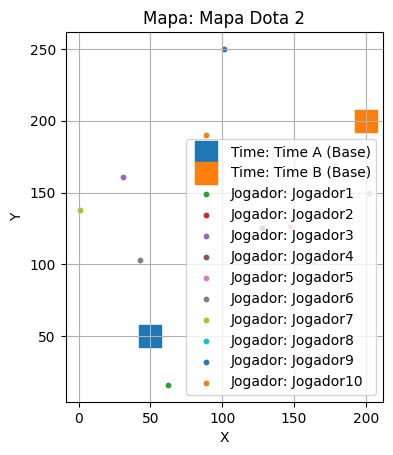

In [30]:
import matplotlib.pyplot as plt
import numpy as np

class MapaDota2:
    def __init__(self, nome) -> None:
        self.nome = nome
        self.times = []
        self.jogadores_no_mapa = []

    def adicionar_time(self, time):
        if len(self.times) < 2:
            self.times.append(time)
            print(f"Time '{time.nome}' adicionado ao mapa '{self.nome}'.")
        else:
            print(f"O mapa '{self.nome}' já possui 2 times. Não é possível adicionar mais.")

    def adicionar_jogador_no_mapa(self, jogador):
        self.jogadores_no_mapa.append(jogador)
        print(f"Jogador '{jogador.nome}' adicionado ao mapa '{self.nome}'.")

    def visualizar_mapa(self):
        print(f"\nMapa: {self.nome}")
        for time in self.times:
            print(f"Time: {time.nome}")
            print("Jogadores:")
            for jogador in time.jogadores:
                print(f" - {jogador.nome} | Classe: {jogador.classe} | Tipo de Magia: {jogador.tipo_magia}")
        print("Jogadores Sem Time:")
        for jogador in self.jogadores_no_mapa:
            print(f" - {jogador.nome} | Classe: {jogador.classe} | Tipo de Magia: {jogador.tipo_magia}")

    def exibir_mapa_com_matplotlib(self):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")

        for time in self.times:
            x, y = time.posicao_base()
            ax.scatter(x, y, label=f"Time: {time.nome} (Base)", s=250, marker='s')

        for jogador in self.jogadores_no_mapa:
            x, y = jogador.posicao_atual()
            ax.scatter(x, y, label=f"Jogador: {jogador.nome}", s=10, marker='o')

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(f"Mapa: {self.nome}")
        ax.legend()
        plt.grid(True)
        plt.show()

class Time:
    def __init__(self, nome) -> None:
        self.nome = nome
        self.jogadores = []

    def adicionar_jogador(self, jogador):
        self.jogadores.append(jogador)

    def posicao_base(self):
        if self.nome == "Time A":
            return 50, 50
        elif self.nome == "Time B":
            return 200, 200

class Jogador:
    def __init__(self, nome, classe, tipo_magia) -> None:
        self.nome = nome
        self.classe = classe
        self.tipo_magia = tipo_magia

    def posicao_atual(self):
        # Simulando posições aleatórias para os jogadores
        return np.random.randint(0, 256), np.random.randint(0, 256)

# Exemplo de uso:
time1 = Time("Time A")
time2 = Time("Time B")

jogador1 = Jogador("Jogador1", "Guerreiro", "Fogo")
jogador2 = Jogador("Jogador2", "Mago", "Água")
jogador3 = Jogador("Jogador3", "Arqueiro", "Terra")
jogador4 = Jogador("Jogador4", "Guerreiro", "Ar")
jogador5 = Jogador("Jogador5", "Mago", "Fogo")

time1.adicionar_jogador(jogador1)
time1.adicionar_jogador(jogador2)
time1.adicionar_jogador(jogador3)
time2.adicionar_jogador(jogador4)
time2.adicionar_jogador(jogador5)

jogador6 = Jogador("Jogador6", "Feiticeiro", "Água")
jogador7 = Jogador("Jogador7", "Guerreiro", "Fogo")
jogador8 = Jogador("Jogador8", "Mago", "Terra")
jogador9 = Jogador("Jogador9", "Arqueiro", "Fogo")
jogador10 = Jogador("Jogador10", "Feiticeiro", "Água")

mapa_dota2 = MapaDota2("Mapa Dota 2")
mapa_dota2.adicionar_time(time1)
mapa_dota2.adicionar_time(time2)

mapa_dota2.adicionar_jogador_no_mapa(jogador1)
mapa_dota2.adicionar_jogador_no_mapa(jogador2)
mapa_dota2.adicionar_jogador_no_mapa(jogador3)
mapa_dota2.adicionar_jogador_no_mapa(jogador4)
mapa_dota2.adicionar_jogador_no_mapa(jogador5)
mapa_dota2.adicionar_jogador_no_mapa(jogador6)
mapa_dota2.adicionar_jogador_no_mapa(jogador7)
mapa_dota2.adicionar_jogador_no_mapa(jogador8)
mapa_dota2.adicionar_jogador_no_mapa(jogador9)
mapa_dota2.adicionar_jogador_no_mapa(jogador10)

mapa_dota2.visualizar_mapa()
mapa_dota2.exibir_mapa_com_matplotlib()


In [23]:
import matplotlib.pyplot as plt
import numpy as np

class MapaDota:
    # ... (resto da implementação da classe)

    def exibir_mapa(self):
        mapa_array = np.array(self.mapa)
        cmap = plt.get_cmap("viridis", self.montanha + 1)  # Escolha do mapa de cores

        plt.imshow(mapa_array, cmap=cmap, extent=[0, self.tamanho, 0, self.tamanho])
        plt.colorbar()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Mapa Dota")
        plt.show()

# Exemplo de uso:
mapa_dota = MapaDota()

mapa_dota.adicionar_time("Time A", "base")
mapa_dota.adicionar_time("Time B", "topo")

mapa_dota.adicionar_montanhas()

mapa_dota.exibir_mapa()


AttributeError: 'MapaDota' object has no attribute 'adicionar_time'